In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from metrics import custom_accuracy_score, custom_precision_score, custom_recall_score, custom_f1_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
def plot_sk_confusion_matrix(y_true, y_pred):
    """
    This function uses sklearn confusion matrix function and plots the confusion matrix
    :param y_true: true values
    :param y_pred: predicted values
    :return: None
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("Confusion Matrix from sklearn")
    plt.xlabel("Model Predicted Values")
    plt.ylabel("Ground Truth Values")
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    
    for i in range(2):
        for j in range(2):
            if i == j:
                plt.text(j, i, cm[i, j], color='white')
            else:
                plt.text(j, i, cm[i, j], color='black')      
    plt.show()

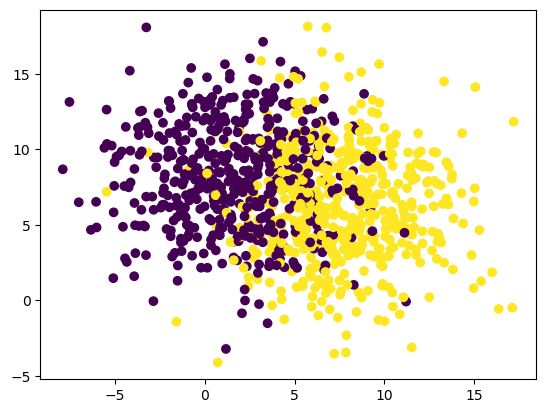

In [4]:
# make blobs makes dataset for classification
data = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=20, cluster_std=3.5)
X, y = data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [5]:
# split the data into train and test. We will use 60% of the data for training and 40% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# We are training a decision tree classifier of depth 3 here
clf = DecisionTreeClassifier(max_depth =3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [6]:
# Uncomment the below code for comparing the custom metrics with sklearn metrics

print("skleran Accuracy Score: {:.3f}".format(accuracy_score(y_test, y_pred)))
print("custom Accuracy Score: {:.3f}".format(custom_accuracy_score(y_test, y_pred)))

print("sklearn Precision Score: {:.3f}".format(precision_score(y_test, y_pred, average='macro')))
print("custom Precision Score: {:.3f}".format(custom_precision_score(y_test, y_pred)))

print("sklearn Recall Score: {:.3f}".format(recall_score(y_test, y_pred, average='macro')))
print("custom Recall Score: {:.3f}".format(custom_recall_score(y_test, y_pred)))

print("sklearn F1 Score: {:.3f}".format(f1_score(y_test, y_pred, average='macro')))
print("custom F1 Score: {:.3f}".format(custom_f1_score(y_test, y_pred)))

skleran Accuracy Score: 0.805
custom Accuracy Score: 0.805
sklearn Precision Score: 0.814
custom Precision Score: 0.814
sklearn Recall Score: 0.816
custom Recall Score: 0.816
sklearn F1 Score: 0.805
custom F1 Score: 0.805


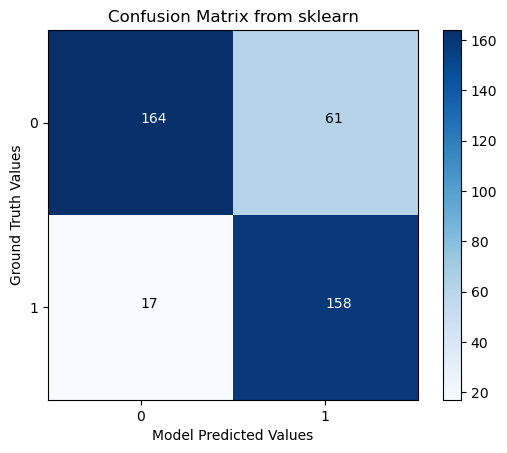

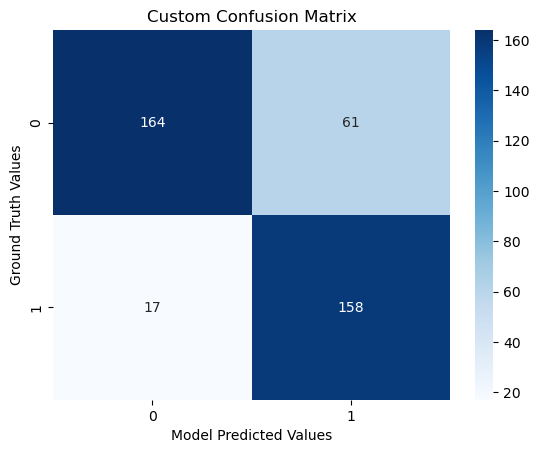

In [7]:
plot_sk_confusion_matrix(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)